In [430]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
# Import train_test_split function
from sklearn.model_selection import train_test_split
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

import numpy as np
import scipy as sp
import pandas as pd
from IPython.display import display, HTML


import numpy as np
import scipy as sp
import pandas as pd
from IPython.display import display, HTML



In [431]:
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd

In [432]:
# Load in the data
dataset = pd.read_csv('C://Users//ashag//Desktop//cta_python//incidentdata.csv')

In [433]:
pos=dataset[dataset['incident']==1]
neg=dataset[dataset['incident']==0]
percent_severe=float(len(pos))/len(dataset)
percent_non_severe=float(len(neg))/len(dataset)
print (percent_severe, percent_non_severe)

0.6948590381426202 0.30514096185737977


In [434]:
print(dataset.dtypes)

site_id                  int64
cta_sites               object
incident_date           object
week_day                object
week_code                int64
weekend                  int64
holiday                  int64
incident_time           object
incident_time.1          int64
time_category           object
time_code                int64
incident_category       object
atm                      int64
restaurant               int64
avgtemp                  int64
maxtemp                  int64
totalsnow              float64
sunhour                float64
sunset                  object
sunrise                 object
moonrise                object
moonset                 object
Temperature              int64
weather_description     object
Humidity                 int64
cloudcover               int64
heatindex                int64
hours_after_sunrise    float64
hours_to_sunset        float64
incident                 int64
dtype: object


In [435]:
dataset=dataset.drop('cta_sites',axis=1)
dataset=dataset.drop('incident_date',axis=1)
dataset= dataset.drop('incident_time.1',1)
dataset=dataset.drop('moonrise',axis=1)
dataset=dataset.drop('sunrise',axis=1)
#dataset=dataset.drop('incident_type',axis=1)
dataset=dataset.drop('moonset',axis=1)
dataset=dataset.drop('weather_description',axis=1)
dataset=dataset.drop('time_category',axis=1)
dataset=dataset.drop('incident_time',axis=1)
dataset=dataset.drop('week_day',axis=1)
dataset=dataset.drop('sunset',axis=1)
dataset=dataset.drop('incident_category',axis=1)
#dataset=dataset.drop('moonset',axis=1)

In [436]:
data=dataset.copy(deep=True) 

In [437]:


from sklearn import metrics

In [438]:
from sklearn.model_selection import train_test_split
itrain, itest = train_test_split(range(data.shape[0]), train_size=0.7)
mask=np.ones(data.shape[0], dtype='int')
mask[itrain]=1
mask[itest]=0
mask=(mask==1)

In [448]:
data.head()

site_id  week_code  weekend  holiday  time_code  atm  restaurant  avgtemp  \
0       14          1        0        0          1    0           0       32   
1        5          2        0        1          1    0           0       34   
2       12          2        0        1          1    0           0       34   
3      143          3        0        0          1    0           0       41   
4       15          3        0        0          2    1           1       41   

   maxtemp  totalsnow   sunhour  Temperature  Humidity  cloudcover  heatindex  \
0       34  -0.205097 -0.707440           32        76         100         32   
1       39  -0.391012  0.664323           28        82          30         28   
2       39  -0.387629  0.725054           28        83          28         28   
3       45  -0.387629 -0.630007           43        76          74         43   
4       45  -0.387629 -0.630007           43        90          64         43   

   hours_after_sunrise  hours_to_sunset  incident  
0            -1.045248         0.958102         1  
1            -1.246621         1.046369         0  
2            -1.159121         0.964784         0  
3            -1.159121         0.967457         1  
4             1.386284        -1.571899         0

In [449]:
data.shape

(603, 18)

In [450]:
standard=["totalsnow","sunhour","hours_after_sunrise","hours_to_sunset"]

In [451]:
indicator=list(data.columns)

In [452]:
indicator.remove('incident')

In [453]:
for i in standard:
    indicator.remove(i)
print (len(standard), len(indicator))

4 13


In [454]:
from sklearn.preprocessing import StandardScaler
#Standardize training set
data.loc[mask,standard]=StandardScaler().fit_transform(data.loc[mask,standard])
#Standardize test set
data.loc[~mask,standard]=StandardScaler().fit_transform(data.loc[~mask,standard])

In [455]:
data.head(5)

site_id  week_code  weekend  holiday  time_code  atm  restaurant  avgtemp  \
0       14          1        0        0          1    0           0       32   
1        5          2        0        1          1    0           0       34   
2       12          2        0        1          1    0           0       34   
3      143          3        0        0          1    0           0       41   
4       15          3        0        0          2    1           1       41   

   maxtemp  totalsnow   sunhour  Temperature  Humidity  cloudcover  heatindex  \
0       34  -0.205097 -0.707440           32        76         100         32   
1       39  -0.391012  0.664323           28        82          30         28   
2       39  -0.387629  0.725054           28        83          28         28   
3       45  -0.387629 -0.630007           43        76          74         43   
4       45  -0.387629 -0.630007           43        90          64         43   

   hours_after_sunrise  hours_to_sunset  incident  
0            -1.045248         0.958102         1  
1            -1.246621         1.046369         0  
2            -1.159121         0.964784         0  
3            -1.159121         0.967457         1  
4             1.386284        -1.571899         0

In [456]:
pos=data[data['incident']==1]
neg=data[data['incident']==0]
percent_severe=float(len(pos))/len(data)
percent_non_severe=float(len(neg))/len(data)
print (percent_severe, percent_non_severe)

0.6948590381426202 0.30514096185737977


In [457]:
#Let's make a dictionary storing confusion matrix for all the algorithms, so that we can have some comparison
confusion_dict={}
confusion_dict["Baseline_model"]=np.asarray([[len(neg),0],[len(pos),0]])
#Also create a dictionary to store all the models
model_dict={}
#The following dict will store the accuracy for training set
accuracy_dict={}
#The following dict will store the accuracy for test set
accuracy_dict1={}
train_not_severe_percent=1-float(sum(data["incident"].values[mask]))/len(data["incident"].values[mask])
test_not_severe_percent=1-float(sum(data["incident"].values[~mask]))/len(data["incident"].values[~mask])
print (train_not_severe_percent, test_not_severe_percent )
accuracy_dict["Baseline_model"]=train_not_severe_percent
accuracy_dict1["Baseline_model"]=test_not_severe_percent

0.3033175355450237 0.30939226519337015


# Modelling

In [458]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

In [459]:
total_features=standard+indicator

In [460]:

def do_classify(clf, parameters, indf, featurenames, targetname, target1val, mask, score_func=None, n_folds=5):
    subdf=indf[featurenames]
    X=subdf.values
    y=(indf[targetname].values==target1val)*1
    Xtrain, Xtest, ytrain, ytest = X[mask], X[~mask], y[mask], y[~mask]
    if parameters:
        clf = cv_optimize(clf, parameters, Xtrain, ytrain, n_folds=n_folds, score_func=score_func)
    clf=clf.fit(Xtrain, ytrain)
    training_accuracy = clf.score(Xtrain, ytrain)
    test_accuracy = clf.score(Xtest, ytest)
    print ("Training accuracy: %0.2f" % (training_accuracy))
    print("Test accuracy:     %0.2f" % (test_accuracy))
    confmatrix=confusion_matrix(ytest, clf.predict(Xtest))
    print (confmatrix)
    print (clf)
    return clf, Xtrain, ytrain, Xtest, ytest, confmatrix, training_accuracy, test_accuracy

In [461]:
def cv_optimize(clf, parameters, X, y, n_folds=5, score_func=None):
    if score_func:
        gs=GridSearchCV(clf, param_grid=parameters, cv=n_folds, scoring=score_func)
    else:
        gs=GridSearchCV(clf, param_grid=parameters, cv=n_folds)
    gs.fit(X, y)
    best = gs.best_estimator_
    return best

In [462]:
from sklearn.linear_model import LogisticRegression
clflog = LogisticRegression(penalty="l1")
clflog, Xtrain, ytrain, Xtest, ytest, confclflog, training_accuracy, test_accuracy=do_classify(clflog, {"C": [0.001, 0.01, 0.1, 1.0, 10.0, 20.0, 40.0, 70.0, 100.0]}, data, total_features, 'incident', 1, mask=mask)
confusion_dict["Logistic"]=confclflog
model_dict["Logistic"]=clflog
accuracy_dict["Logistic"]=training_accuracy
accuracy_dict1["Logistic"]=test_accuracy

C:\Users\ashag\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ashag\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ashag\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ashag\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ashag\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

C:\Users\ashag\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ashag\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ashag\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Training accuracy: 0.70
Test accuracy:     0.69
[[  0  56]
 [  0 125]]
LogisticRegression(C=0.001, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)


C:\Users\ashag\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ashag\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ashag\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [463]:
from sklearn.metrics import classification_report
y_pred=clflog.predict(Xtest)
print (classification_report(ytest,y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        56
           1       0.69      1.00      0.82       125

    accuracy                           0.69       181
   macro avg       0.35      0.50      0.41       181
weighted avg       0.48      0.69      0.56       181



C:\Users\ashag\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [464]:
from sklearn.tree import DecisionTreeClassifier
clfdt=DecisionTreeClassifier()
clfdt, Xtrain, ytrain, Xtest, ytest, confclfdt, training_accuracy, test_accuracy = do_classify(clfdt, {"max_depth":range(1,20,2)}, data, total_features, 'incident',1, mask=mask)
confusion_dict["decision tree"]=confclfdt
model_dict["decision tree"]=clfdt
accuracy_dict["decision tree"]=training_accuracy
accuracy_dict1["decision tree"]=test_accuracy

Training accuracy: 0.85
Test accuracy:     0.85
[[ 51   5]
 [ 22 103]]
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')


C:\Users\ashag\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [465]:
#random_state = np.random.RandomState(0)
#classifier = DecisionTreeClassifier(random_state=random_state)
#classifier.fit(Xtrain, ytrain)

#y_score=clfdt.score(Xtest,ytest)
#y_score1=classifier.clfdt(Xtest)

In [469]:
from sklearn.metrics import classification_report
y_pred=clfdt.predict(Xtest)
print (classification_report(ytest,y_pred))

              precision    recall  f1-score   support

           0       0.70      0.91      0.79        56
           1       0.95      0.82      0.88       125

    accuracy                           0.85       181
   macro avg       0.83      0.87      0.84       181
weighted avg       0.87      0.85      0.86       181



In [470]:
from sklearn.metrics import precision_recall_curve

precision,recall,thresholds= precision_recall_curve(ytest,y_pred)


In [471]:
print('Accuracy: ', y_score)

Accuracy:  0.850828729281768


In [472]:
# Compute the average precision score
from sklearn.metrics import precision_score
micro_precision = precision_score(y_pred, ytest, average='micro')
print('Micro-averaged precision score: {0:0.2f}'.format(
      micro_precision))

macro_precision = precision_score(y_pred, ytest, average='macro')
print('Macro-averaged precision score: {0:0.2f}'.format(
      macro_precision))

per_class_precision = precision_score(y_pred, ytest, average=None)
print('Per-class precision score:', per_class_precision)

Micro-averaged precision score: 0.85
Macro-averaged precision score: 0.87
Per-class precision score: [0.91071429 0.824     ]


In [474]:
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(ytest, y_score)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

TypeError: Singleton array 0.850828729281768 cannot be considered a valid collection.

In [475]:
from sklearn.naive_bayes import GaussianNB
clfgnb = GaussianNB()
clfgnb, Xtrain, ytrain, Xtest, ytest, confgnb, training_accuracy, test_accuracy=do_classify(clfgnb, None, data, total_features, 'incident',1, mask=mask)
confusion_dict["Naive Bayes"]=confgnb
model_dict["Naive Bayes"]=clfgnb
accuracy_dict["Naive Bayes"]=training_accuracy
accuracy_dict1["Naive Bayes"]=test_accuracy

Training accuracy: 0.66
Test accuracy:     0.66
[[31 25]
 [37 88]]
GaussianNB(priors=None, var_smoothing=1e-09)


In [125]:
from sklearn.metrics import classification_report
y_pred=clfgnb.predict(Xtest)
print (classification_report(ytest,y_pred))

              precision    recall  f1-score   support

           0       0.55      0.49      0.52        55
           1       0.79      0.83      0.81       126

    accuracy                           0.72       181
   macro avg       0.67      0.66      0.66       181
weighted avg       0.72      0.72      0.72       181



In [476]:
from sklearn.ensemble import RandomForestClassifier
randf=RandomForestClassifier()
randf, Xtrain, ytrain, Xtest, ytest, randfdt, training_accuracy, test_accuracy=do_classify(randf, {"n_estimators":[10, 20, 30, 40, 100]}, data, total_features, 'incident',1, mask=mask)
confusion_dict["Random forest"]=randfdt
model_dict["Random forest"]=randf
accuracy_dict["Random forest"]=training_accuracy
accuracy_dict1["Random forest"]=test_accuracy

from sklearn.metrics import classification_report
y_pred=randf.predict(Xtest)
print (classification_report(ytest,y_pred))

Training accuracy: 1.00
Test accuracy:     0.81
[[ 33  23]
 [ 11 114]]
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
              precision    recall  f1-score   support

           0       0.75      0.59      0.66        56
           1       0.83      0.91      0.87       125

    accuracy                           0.81       181
   macro avg       0.79      0.75      0.77       181
weighted avg       0.81      0.81      0.81       181



C:\Users\ashag\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [134]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier()
neigh, Xtrain1, ytrain1, Xtest1, ytest1, confknn, training_accuracy, test_accuracy=do_classify(neigh, {"n_neighbors":[5, 10, 20, 40]}, data, total_features, 'incident',1, mask=mask)
confusion_dict["KNN"]=confknn
model_dict["KNN"]=neigh
accuracy_dict["KNN"]=training_accuracy
accuracy_dict1["KNN"]=test_accuracy

from sklearn.metrics import classification_report
y_pred=neigh.predict(Xtest)
print (classification_report(ytest,y_pred))

Training accuracy: 0.81
Test accuracy:     0.78
[[ 34  21]
 [ 18 108]]
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')
              precision    recall  f1-score   support

           0       0.65      0.62      0.64        55
           1       0.84      0.86      0.85       126

    accuracy                           0.78       181
   macro avg       0.75      0.74      0.74       181
weighted avg       0.78      0.78      0.78       181



C:\Users\ashag\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [133]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier()
ada, Xtrain, ytrain, Xtest, ytest, confada, training_accuracy, test_accuracy=do_classify(ada, {"n_estimators":[30, 50, 100]}, data, total_features, 'incident',1, mask=mask)
confusion_dict["Ada Boost"]=confada
model_dict["Ada Boost"]=ada
accuracy_dict["Ada Boost"]=training_accuracy
accuracy_dict1["Ada Boost"]=test_accuracy

from sklearn.metrics import classification_report
y_pred=ada.predict(Xtest)
print (classification_report(ytest,y_pred))

Training accuracy: 0.95
Test accuracy:     0.88
[[ 48   7]
 [ 15 111]]
AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=100, random_state=None)
              precision    recall  f1-score   support

           0       0.76      0.87      0.81        55
           1       0.94      0.88      0.91       126

    accuracy                           0.88       181
   macro avg       0.85      0.88      0.86       181
weighted avg       0.89      0.88      0.88       181



In [132]:

from sklearn.ensemble import GradientBoostingClassifier

Gradientboost=GradientBoostingClassifier()

Gradientboost,Xtrain, ytrain, Xtest, ytest, confada, training_accuracy, test_accuracy=do_classify(Gradientboost, {"n_estimators":[30, 50, 100]}, data, total_features, 'incident',1, mask=mask)

confusion_dict["Ada Boost"]=confada
model_dict["Ada Boost"]=Gradientboost
accuracy_dict["Ada Boost"]=training_accuracy
accuracy_dict1["Ada Boost"]=test_accuracy

from sklearn.metrics import classification_report
y_pred=Gradientboost.predict(Xtest)
print (classification_report(ytest,y_pred))

Training accuracy: 1.00
Test accuracy:     0.89
[[ 46   9]
 [ 11 115]]
GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
              precision    recall  f1-score   support

           0       0.81      0.84      0.82        55
           1       0.93      0.91      0.92       126

    accuracy                           0.89       181
   macro avg       0.87      0.87  

In [139]:
from sklearn.ensemble import ExtraTreesClassifier
Extratree=ExtraTreesClassifier()

Extratree,Xtrain, ytrain, Xtest, ytest, confada, training_accuracy, test_accuracy=do_classify(Extratree, {"n_estimators":[30, 50, 100]}, data, total_features, 'incident',1, mask=mask)

confusion_dict["Ada Boost"]=confada
model_dict["Ada Boost"]=Extratree
accuracy_dict["Ada Boost"]=training_accuracy
accuracy_dict1["Ada Boost"]=test_accuracy

from sklearn.metrics import classification_report
y_pred=Extratree.predict(Xtest)
print (classification_report(ytest,y_pred))

C:\Users\ashag\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Training accuracy: 1.00
Test accuracy:     0.81
[[ 32  23]
 [ 11 115]]
ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
                     max_depth=None, max_features='auto', max_leaf_nodes=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)
              precision    recall  f1-score   support

           0       0.74      0.58      0.65        55
           1       0.83      0.91      0.87       126

    accuracy                           0.81       181
   macro avg       0.79      0.75      0.76       181
weighted avg       0.81      0.81      0.80       181



In [72]:
#REFERENCE: The following code are from hw3 and lab
from sklearn.metrics import roc_curve, auc
def make_roc(name, clf, ytest, xtest, ax=None, labe=5, proba=True, skip=0):
    initial=False
    if not ax:
        ax=plt.gca()
        initial=True
    if proba:#for stuff like logistic regression
        fpr, tpr, thresholds=roc_curve(ytest, clf.predict_proba(xtest)[:,1])
    else:#for stuff like SVM
        fpr, tpr, thresholds=roc_curve(ytest, clf.decision_function(xtest))
    roc_auc = auc(fpr, tpr)
    if skip:
        l=fpr.shape[0]
        ax.plot(fpr[0:l:skip], tpr[0:l:skip], '.-', alpha=0.3, label='ROC curve for %s (area = %0.2f)' % (name, roc_auc))
    else:
        ax.plot(fpr, tpr, '.-', alpha=0.3, label='ROC curve for %s (area = %0.2f)' % (name, roc_auc))
    label_kwargs = {}
    label_kwargs['bbox'] = dict(
        boxstyle='round,pad=0.3', alpha=0.2,
    )
    if labe!=None:
        for k in xrange(0, fpr.shape[0],labe):
            #from https://gist.github.com/podshumok/c1d1c9394335d86255b8
            threshold = str(np.round(thresholds[k], 2))
            ax.annotate(threshold, (fpr[k], tpr[k]), **label_kwargs)
    if initial:
        ax.plot([0, 1], [0, 1], 'k--')
        ax.set_xlim([0.0, 1.0])
        ax.set_ylim([0.0, 1.05])
        ax.set_xlabel('False Positive Rate')
        ax.set_ylabel('True Positive Rate')
        ax.set_title('ROC')
    ax.legend(loc="lower right")
    return ax

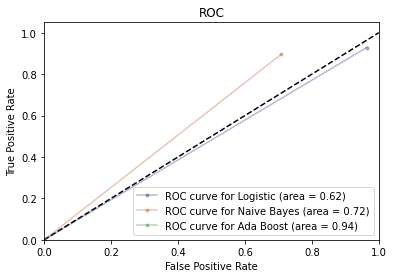

In [82]:
#Compare ROC curve - Figure 1
#Note that not all algorithms support ROC curve
#Reference: hw3
with sns.color_palette("dark"):
    ax=make_roc("Logistic",clflog, ytest, Xtest, None, labe=None, proba=True, skip=50);
    #make_roc("K neighbour",neigh, ytest, Xtest, ax, labe=None, proba=False, skip=50);
    make_roc("Naive Bayes",clfgnb, ytest, Xtest, ax, labe=None, proba=True,  skip=50);
    #make_roc("Random forest",randf, ytest, Xtest, ax, labe=None, proba=True,  skip=50);
    make_roc("Ada Boost",ada, ytest, Xtest, ax, labe=None, proba=True,  skip=50);

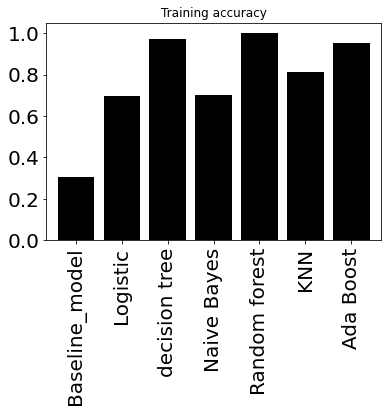

In [77]:
#Compare training and testing accuracy
pd.Series(accuracy_dict).plot(kind="bar",title="Training accuracy",width=0.8,color="black", fontsize=20)

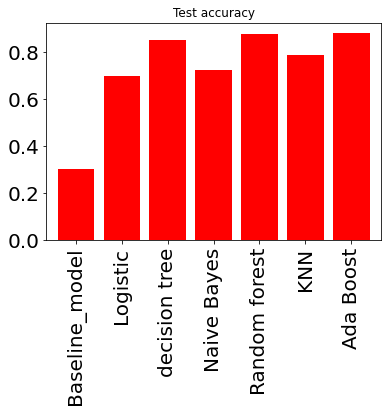

In [76]:
#aining and testing accuracy
pd.Series(accuracy_dict1).plot(kind="bar",title="Test accuracy",width=0.8, color="red",fontsize=20)

# Multiclass

In [360]:
# Load in the data
dataset = pd.read_csv('C://Users//ashag//Desktop//cta_python//incidentdata.csv')

In [361]:
pos=dataset[dataset['incident']==1]
neg=dataset[dataset['incident']==0]
percent_severe=float(len(pos))/len(dataset)
percent_non_severe=float(len(neg))/len(dataset)
print (percent_severe, percent_non_severe)

0.6948590381426202 0.30514096185737977


In [362]:
print(dataset.dtypes)

site_id                  int64
cta_sites               object
incident_date           object
week_day                object
week_code                int64
weekend                  int64
holiday                  int64
incident_time           object
incident_time.1          int64
time_category           object
time_code                int64
incident_category       object
atm                      int64
restaurant               int64
avgtemp                  int64
maxtemp                  int64
totalsnow              float64
sunhour                float64
sunset                  object
sunrise                 object
moonrise                object
moonset                 object
Temperature              int64
weather_description     object
Humidity                 int64
cloudcover               int64
heatindex                int64
hours_after_sunrise    float64
hours_to_sunset        float64
incident                 int64
dtype: object


In [363]:
dataset=dataset.drop('cta_sites',axis=1)
dataset=dataset.drop('incident_date',axis=1)
dataset= dataset.drop('incident_time',1)
#dataset= dataset.drop('incident_time.1',1)
dataset=dataset.drop('moonrise',axis=1)
dataset=dataset.drop('sunrise',axis=1)
#dataset=dataset.drop('incident_type',axis=1)
dataset=dataset.drop('moonset',axis=1)
dataset=dataset.drop('weather_description',axis=1)
dataset=dataset.drop('time_category',axis=1)
dataset=dataset.drop('incident_time',axis=1)
dataset=dataset.drop('week_day',axis=1)
dataset=dataset.drop('heatindex',axis=1)
dataset=dataset.drop('Humidity',axis=1)
dataset=dataset.drop('cloudcover',axis=1)


dataset=dataset.drop('sunset',axis=1)
#dataset=dataset.drop('incident_category',axis=1)
#dataset=dataset.drop('moonset',axis=1)

In [364]:
dataset.dtypes

site_id                  int64
week_code                int64
weekend                  int64
holiday                  int64
incident_time.1          int64
time_code                int64
incident_category       object
atm                      int64
restaurant               int64
avgtemp                  int64
maxtemp                  int64
totalsnow              float64
sunhour                float64
Temperature              int64
hours_after_sunrise    float64
hours_to_sunset        float64
incident                 int64
dtype: object

In [365]:
data2=dataset.copy(deep=True) 

In [366]:

data2=data2.groupby("incident_category")["incident_category"].count()
#data2.order(ascending=False, inplace=True)
data2

incident_category
Access Control              14
Accident                    19
Alarms                       4
Assault                     30
Disturbance                210
Elevator issue               2
Emergency                   23
Equipment Misuse             1
General                     56
Hazards                      4
Maintenance                  3
Motor Vehicle Vandalism      5
Theft                       20
Tresspass                   13
Unsecure element            11
Weapons found                2
none                       186
Name: incident_category, dtype: int64

In [395]:
dummydf=pd.get_dummies(dataset,columns=["incident_category"])

In [396]:
dummydf=dummydf.join(dataset[["incident_category"]])

In [477]:
dummydf.columns

Index(['site_id', 'week_code', 'weekend', 'holiday', 'incident_time.1',
       'time_code', 'atm', 'restaurant', 'avgtemp', 'maxtemp', 'totalsnow',
       'sunhour', 'Temperature', 'hours_after_sunrise', 'hours_to_sunset',
       'incident', 'incident_category_Access Control',
       'incident_category_Accident', 'incident_category_Alarms',
       'incident_category_Assault', 'incident_category_Disturbance ',
       'incident_category_Elevator issue', 'incident_category_Emergency',
       'incident_category_Equipment Misuse', 'incident_category_General',
       'incident_category_Hazards', 'incident_category_Maintenance',
       'incident_category_Motor Vehicle Vandalism', 'incident_category_Theft',
       'incident_category_Tresspass', 'incident_category_Unsecure element',
       'incident_category_Weapons found', 'incident_category_none',
       'incident_category', 'type'],
      dtype='object')

In [398]:
print (dummydf.shape)

(603, 34)


In [399]:
def get_categorical_integer(row):
    if row=="Access Control":
        return int(0)
    elif row=="Accident":
        return int(1)
    elif row=="Alarms":
        return int(2)
    elif row=="Assault":
        return int(3)
    elif row=="Disturbance ":
        return int(4)
    elif row=="Elevator issue":
        return int(5)
    elif row=="Emergency":
        return int(6)
    elif row=="Equipment Misuse":
        return int(7)
    elif row=="General":
        return int(8)
    elif row=="Hazards":
        return int(9)
    elif row=="Maintenance":
        return int(10)
    elif row=="Motor Vehicle Vandalism":
        return int(11)
    elif row=="Theft":
        return int(12)
    elif row=="Tresspass":
        return int(13)
    elif row=="Unsecure element":
        return int(14)
    elif row=="Weapons found":
        return int(15)
    elif row=="none":
        return int(16)

In [400]:
data1 = data1.reset_index(drop=True)
data1.head()

site_id  week_code  weekend  holiday  incident_time.1  time_code  atm  \
0       14          1        0        0                3          1    0   
1        5          2        0        1                2          1    0   
2       12          2        0        1                3          1    0   
3      143          3        0        0                3          1    0   
4       15          3        0        0               22          2    1   

   restaurant  avgtemp  maxtemp  ...  incident_category_Hazards  \
0           0       32       34  ...                          0   
1           0       34       39  ...                          0   
2           0       34       39  ...                          0   
3           0       41       45  ...                          0   
4           1       41       45  ...                          0   

   incident_category_Maintenance  incident_category_Motor Vehicle Vandalism  \
0                              0                                          0   
1                              0                                          0   
2                              0                                          0   
3                              0                                          0   
4                              0                                          0   

   incident_category_Theft  incident_category_Tresspass  \
0                        0                            0   
1                        0                            0   
2                        0                            0   
3                        0                            0   
4                        0                            0   

   incident_category_Unsecure element  incident_category_Weapons found  \
0                                   0                                0   
1                                   0                                0   
2                                   0                                0   
3                                   0                                0   
4                                   0                                0   

   incident_category_none  incident_category  type  
0                       0       Disturbance      4  
1                       1               none    16  
2                       1               none    16  
3                       0           Accident     1  
4                       1               none    16  

[5 rows x 35 columns]

In [401]:


#Assign each of the crime type an integer identifier. We will input these integer identifier directly for the algorithms below.
dummydf["type"]=dummydf["incident_category"].apply(get_categorical_integer)

In [402]:
#dummydf.dtypes

In [403]:
data1=dummydf.copy(deep=True) 

In [404]:
mask=np.ones(data1.shape[0], dtype='int')
itrain, itest = train_test_split(range(data1.shape[0]), train_size=0.7)
mask[itrain]=1
mask[itest]=0
mask=(mask==1)

In [405]:
standard1=["totalsnow","sunhour","hours_after_sunrise","hours_to_sunset"]

In [406]:
indicator1=list(data1.columns)

In [407]:
indicator1.remove('incident_category')

In [408]:
for i in standard1:
    indicator1.remove(i)
print (len(standard1), len(indicator1))

4 30


In [409]:
total_features=standard1+indicator1

In [410]:
data1 = data1.reset_index(drop=True)
data1.head()

site_id  week_code  weekend  holiday  incident_time.1  time_code  atm  \
0       14          1        0        0                3          1    0   
1        5          2        0        1                2          1    0   
2       12          2        0        1                3          1    0   
3      143          3        0        0                3          1    0   
4       15          3        0        0               22          2    1   

   restaurant  avgtemp  maxtemp  ...  incident_category_Hazards  \
0           0       32       34  ...                          0   
1           0       34       39  ...                          0   
2           0       34       39  ...                          0   
3           0       41       45  ...                          0   
4           1       41       45  ...                          0   

   incident_category_Maintenance  incident_category_Motor Vehicle Vandalism  \
0                              0                                          0   
1                              0                                          0   
2                              0                                          0   
3                              0                                          0   
4                              0                                          0   

   incident_category_Theft  incident_category_Tresspass  \
0                        0                            0   
1                        0                            0   
2                        0                            0   
3                        0                            0   
4                        0                            0   

   incident_category_Unsecure element  incident_category_Weapons found  \
0                                   0                                0   
1                                   0                                0   
2                                   0                                0   
3                                   0                                0   
4                                   0                                0   

   incident_category_none  incident_category  type  
0                       0       Disturbance      4  
1                       1               none    16  
2                       1               none    16  
3                       0           Accident     1  
4                       1               none    16  

[5 rows x 35 columns]

In [411]:
#from sklearn.preprocessing import StandardScaler
#Standardize training set
data1.loc[mask,standard1]=StandardScaler().fit_transform(data1.loc[mask,standard1])
#Standardize test set
data1.loc[~mask,standard1]=StandardScaler().fit_transform(data1.loc[~mask,standard1])
data1.head()

site_id  week_code  weekend  holiday  incident_time.1  time_code  atm  \
0       14          1        0        0                3          1    0   
1        5          2        0        1                2          1    0   
2       12          2        0        1                3          1    0   
3      143          3        0        0                3          1    0   
4       15          3        0        0               22          2    1   

   restaurant  avgtemp  maxtemp  ...  incident_category_Hazards  \
0           0       32       34  ...                          0   
1           0       34       39  ...                          0   
2           0       34       39  ...                          0   
3           0       41       45  ...                          0   
4           1       41       45  ...                          0   

   incident_category_Maintenance  incident_category_Motor Vehicle Vandalism  \
0                              0                                          0   
1                              0                                          0   
2                              0                                          0   
3                              0                                          0   
4                              0                                          0   

   incident_category_Theft  incident_category_Tresspass  \
0                        0                            0   
1                        0                            0   
2                        0                            0   
3                        0                            0   
4                        0                            0   

   incident_category_Unsecure element  incident_category_Weapons found  \
0                                   0                                0   
1                                   0                                0   
2                                   0                                0   
3                                   0                                0   
4                                   0                                0   

   incident_category_none  incident_category  type  
0                       0       Disturbance      4  
1                       1               none    16  
2                       1               none    16  
3                       0           Accident     1  
4                       1               none    16  

[5 rows x 35 columns]

In [412]:
def do_classify2(clf, parameters, indf, featurenames,targetname, mask, score_func=None, n_folds=5):
    subdf=indf[featurenames]
    X=subdf.values
#y will be an array with integer values for different categories (0, 1, 2, 3...)
    y=indf[targetname]
    Xtrain, Xtest, ytrain, ytest = X[mask], X[~mask], y[mask], y[~mask]
    if parameters:
        clf = cv_optimize(clf, parameters, Xtrain, ytrain, n_folds=n_folds, score_func=score_func)
    clf=clf.fit(Xtrain, ytrain)
    training_accuracy = clf.score(Xtrain, ytrain)
    test_accuracy = clf.score(Xtest, ytest)
    print ("Training accuracy: %0.2f" % (training_accuracy))
    print ("Test accuracy:     %0.2f" % (test_accuracy))
    confmatrix=confusion_matrix(ytest, clf.predict(Xtest))
    print (confmatrix)
    print (clf)
    return clf, Xtrain, ytrain, Xtest, ytest, training_accuracy, test_accuracy

# 0 base line model

In [421]:
#print (float(len(data1[data1["type"]==0]))/len(data1))
train_disturbance_percent=float(sum(data1["incident_category_Disturbance "].values[mask]))/len(data1["incident_category_Disturbance "].values[mask])
test_disturbance_percent=float(sum(data1["incident_category_Disturbance "].values[~mask]))/len(data1["incident_category_Disturbance "].values[~mask])

print (train_disturbance_percent)
print (test_disturbance_percent)

accuracy_multi_train={}
accuracy_multi_test={}
accuracy_multi_train["Baseline model"]=train_disturbance_percent
accuracy_multi_test["Baseline model"]=test_disturbance_percent

0.35545023696682465
0.3314917127071823


In [422]:
baseline_accuracy= accuracy_multi_train["Baseline model"]=train_disturbance_percent

In [423]:
baseline_accuracy

0.35545023696682465

In [414]:
from sklearn.tree import DecisionTreeClassifier
clfdt_multi=DecisionTreeClassifier()
clfdt_multi, Xtrain, itrain, Xtest, ytest, training_accuracy, test_accuracy=do_classify2(clfdt_multi, {"max_depth":range(1,20,2)}, data1, total_features, "type", mask=mask)
accuracy_multi_train["Decision tree multiclass"]=training_accuracy
accuracy_multi_test["Decision tree multiclass"]=test_accuracy

Training accuracy: 0.99
Test accuracy:     0.95
[[ 3  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  4  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  3  0  0  0  0  0  0]
 [ 0  0  0  5  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 60  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  8  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 22  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  4  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  3  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  3  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  3  0  0]
 [ 0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 60]]
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=11,
                       max_features=None, max_leaf_nodes=None

C:\Users\ashag\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
C:\Users\ashag\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [415]:
from sklearn.ensemble import RandomForestClassifier
randfmulti=RandomForestClassifier()
randfmulti, Xtrain, ytrain, Xtest, ytest, training_accuracy, test_accuracy=do_classify2(randfmulti, {"n_estimators":[10, 20, 30, 40, 100]}, data1, total_features, "type", mask=mask)
accuracy_multi_train["Random forest multiclass"]=training_accuracy
accuracy_multi_test["Random forest multiclass"]=test_accuracy

C:\Users\ashag\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


Training accuracy: 1.00
Test accuracy:     0.96
[[ 3  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  4  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  2  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  5  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 60  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  8  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 22  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  2  0  0  0  2  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  1  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  3  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  3  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  3  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  1  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0 60]]
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,

C:\Users\ashag\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [392]:
ytrain

0       4
1      16
2      16
3       1
4      16
5      16
6       6
7      12
8      16
10     16
11     16
12     16
13      3
14      8
15     14
17     16
18      4
20     16
21      8
24     16
25     16
28     13
30      4
32      0
33      4
35      4
36     13
37      2
38     16
39     16
       ..
560     4
561     0
562    16
563    16
564     3
566    12
567    16
569     0
570     6
573    16
574    16
577    14
579    16
580     4
582    16
584     4
587    16
589     4
590    16
591    16
592     4
593     2
594     4
596     3
597     4
598    12
599    16
600    16
601    16
602    16
Name: type, Length: 422, dtype: int64

In [416]:
adamulti=AdaBoostClassifier()
adamulti, Xtrain, ytrain, Xtest, ytest, training_accuracy, test_accuracy=do_classify2(adamulti, {"n_estimators":[10, 20, 30, 40, 100]}, data1, total_features, "type", mask=mask)
accuracy_multi_train["Ada Boost multiclass"]=training_accuracy
accuracy_multi_test["Ada Boost multiclass"]=test_accuracy

C:\Users\ashag\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
C:\Users\ashag\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Training accuracy: 0.86
Test accuracy:     0.88
[[ 0  0  0  0  0  0  0  3  0  0  0  0  0  0  0]
 [ 0  4  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  3  0  0  0  0  0  0  0]
 [ 0  0  0  5  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 60  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  1  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  8  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 22  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  4  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  1  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  3  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  3  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  3  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  1  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0 60]]
AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=100, random_state=None)


In [417]:
from sklearn.linear_model import LogisticRegression
clflogmulti=LogisticRegression(penalty="l2",multi_class='multinomial',solver="newton-cg",max_iter=100)
clflogmulti, Xtrain, ytrain, Xtest, ytest, training_accuracy, test_accuracy=do_classify2(clflogmulti, {"C": [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]}, data1, total_features, 'type', mask=mask)
accuracy_multi_train["Logistic - newton cg"]=training_accuracy
accuracy_multi_test["Logistic - newton cg"]=test_accuracy

C:\Users\ashag\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
C:\Users\ashag\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
C:\Users\ashag\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
C:\Users\ashag\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
C:\Users\ashag\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:203: ConvergenceWarning: newton-cg 

Training accuracy: 1.00
Test accuracy:     0.94
[[ 3  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  4  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 3  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  5  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 60  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  8  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 22  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  2  0  2  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  1  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  3  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  3  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  2  0  1]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  1]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0 60]]
LogisticRegression(C=100.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
          

C:\Users\ashag\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


In [424]:

#What is the accuracy for two-type prediction for a baseline model?
total_predict=len(ytest)
correct_predict=0
for i in range(0,total_predict):
    if ((ytest.iloc[i]==0) | (ytest.iloc[i]==1)):
        correct_predict += 1
    if ytest.iloc[i]==0:
        baseline_accuracy += 1
print (float(correct_predict)/total_predict)

0.03867403314917127


In [425]:
total_predict

181

In [426]:
correct_predict

7